In [1]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os
from datetime import datetime

In [4]:
train_ds = tf.data.Dataset.load(rf"G:\My Drive\dataset\centroset\B-yolov9m-train-single-centrogen").cache()
train_ds = train_ds.shuffle(train_ds.cardinality())
val_ds = tf.data.Dataset.load(rf"G:\My Drive\dataset\centroset\B-yolov9m-val-single-centrogen").cache()
val_ds = val_ds.shuffle(val_ds.cardinality())

In [5]:
# train val test split
from sklearn.model_selection import train_test_split
combined_ds = train_ds.concatenate(val_ds)
X, y = map(np.array, zip(*combined_ds.as_numpy_iterator()))

# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
# # X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# X_train.shape, X_val.shape #, X_test.shape

In [18]:
X.shape, y.shape

((7340, 30, 30), (7340,))

In [19]:
np.where(y == 1)[0].shape, np.where(y == 0)[0].shape

((3655,), (3685,))

In [20]:
X[np.where(y == 1)[0][0]]

array([[0.32614952, 0.47888696, 0.14670202, 0.5195844 , 0.4529621 ,
        0.2969677 , 0.0507076 , 0.72606945, 0.12964842, 0.29490063,
        0.26723877, 0.16387555, 0.41973838, 0.09141796, 0.04924016,
        0.46544963, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.2833805 , 0.5384424 , 0.09312924, 0.5844555 , 0.42590246,
        0.33282253, 0.        , 0.        , 0.07884825, 0.34364173,
        0.24476688, 0.18720637, 0.40356323, 0.10272866, 0.        ,
        0.        , 0.14941591, 0.2731695 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.23809452, 0.6025445 , 0.0734821 , 0.673126  , 0.40858066,
        0.36497736, 0.        , 0.        , 0.03618665, 0.35320318,
        0.21502383, 0.20775896, 0.3891462 , 0.

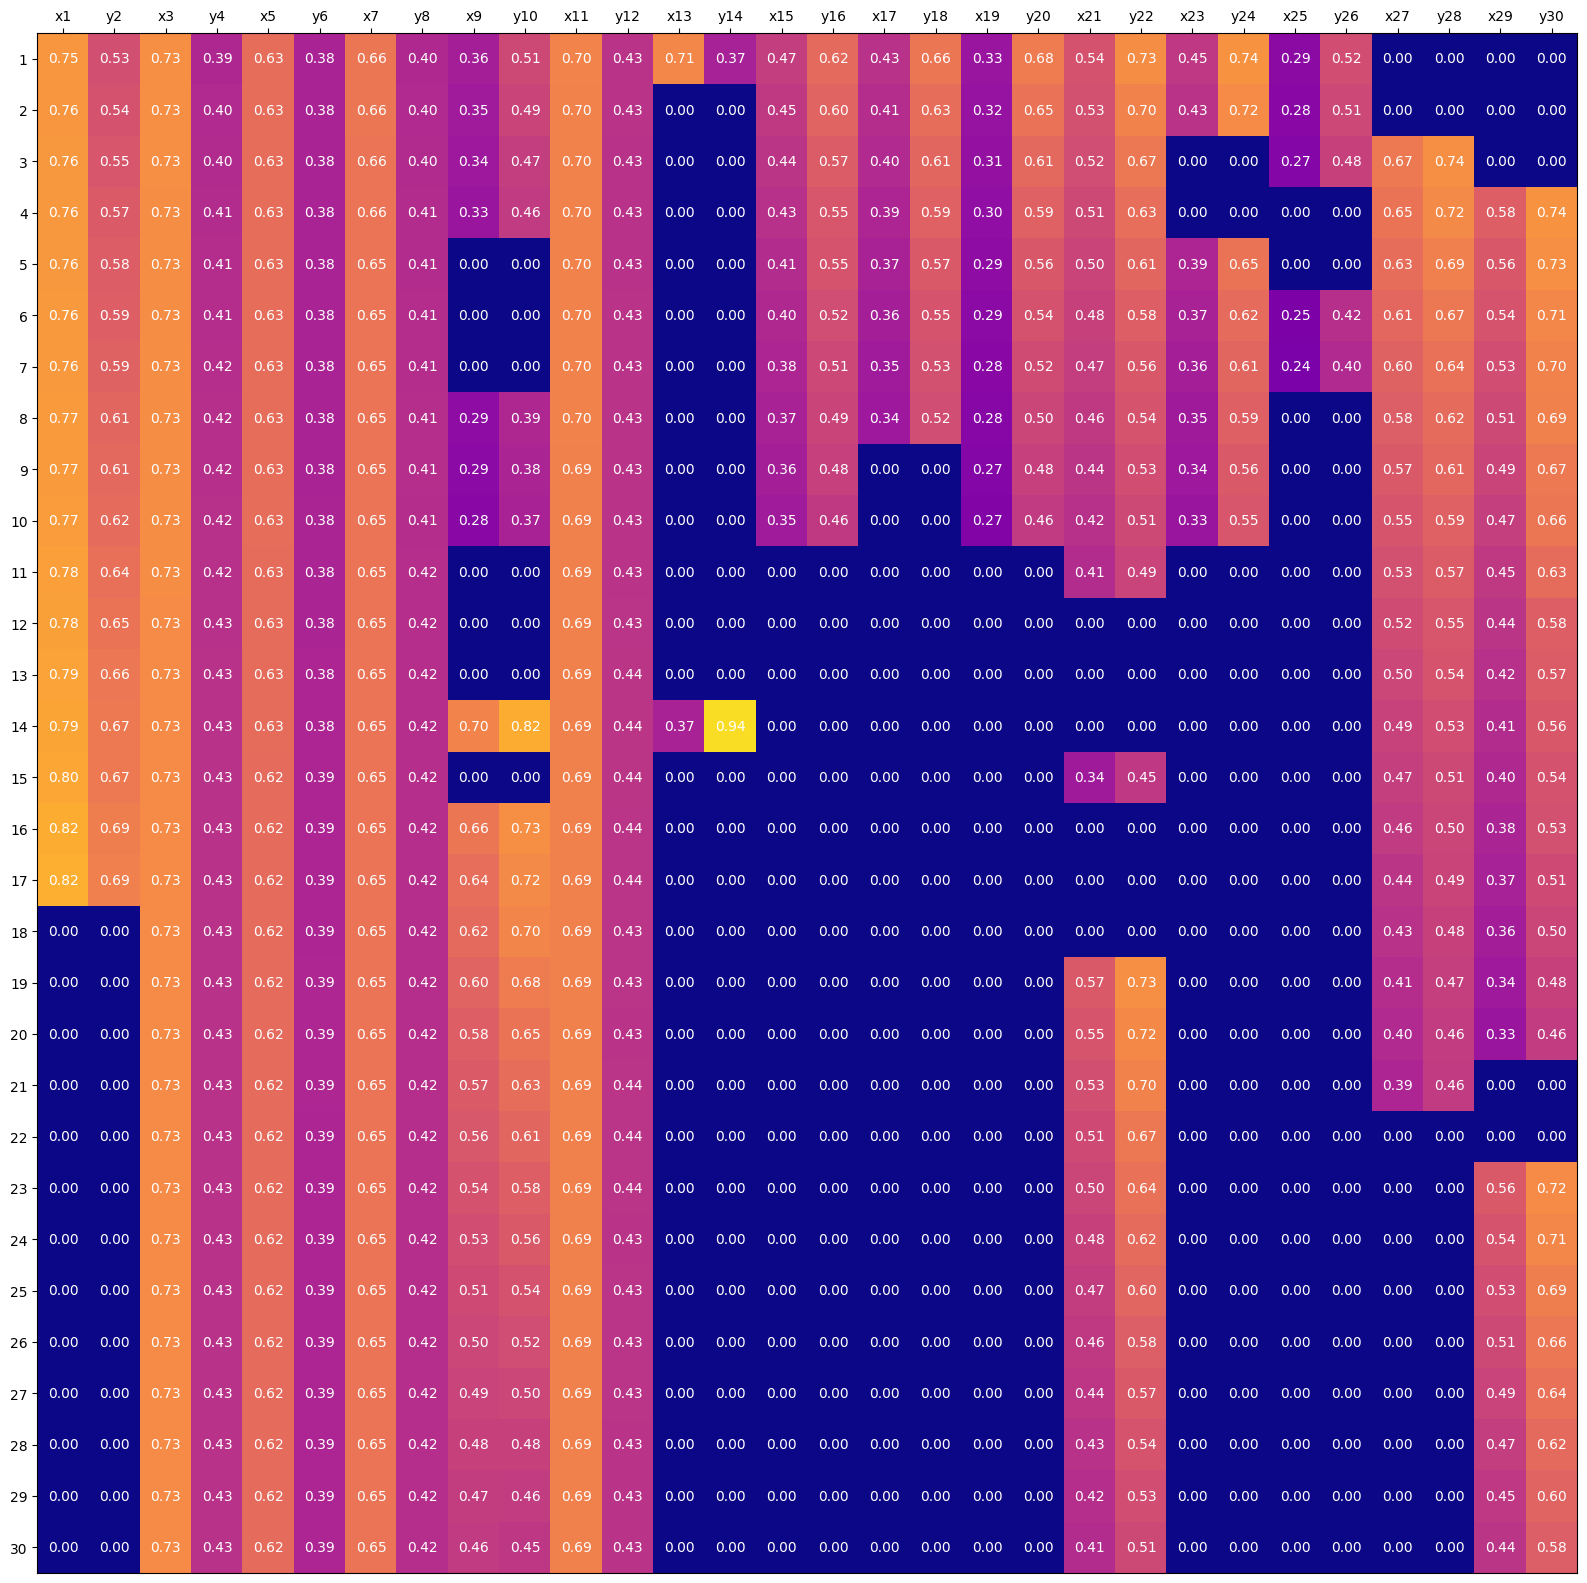

In [34]:
# get X once if y == 1
data = X[np.where(y == 1)[0][199]]
# Create the figure and axis
fig, ax = plt.subplots(figsize=(20, 20))

# Show the image
cax = ax.imshow(data, cmap='plasma', vmin=0, vmax=1)

# Annotate each cell with its value
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        text = ax.text(j, i, f'{data[i, j]:.2f}', ha='center', va='center', color='white')

# Move x-axis to the top
ax.xaxis.tick_top()

# Show all ticks from 1 to 30 on both axes
ax.set_xticks(np.arange(30))
ax.set_yticks(np.arange(30))

# Set tick labels to range from 1 to 30
ax.set_xticklabels(np.array([f"{'x' if i%2==1 else 'y'}{i}" for i in range(1, 31)]))
ax.set_yticklabels(np.arange(1, 31))

# Display the plot
plt.show()

In [8]:
X_train, y_train = map(np.array, zip(*train_ds.as_numpy_iterator()))
X_val, y_val = map(np.array, zip(*val_ds.as_numpy_iterator()))

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((5865, 900), (5865,), (1475, 900), (1475,))

In [87]:
X_train.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

In [5]:
def score(model, X, y):
    y_pred = model.predict(X)
    scr = model.score(X, y)
    print(f"Score: {scr}")
    print(confusion_matrix(y, y_pred))
    print(classification_report(y, y_pred))
    return scr

In [47]:
def check_increasing_scores(scores):
    max_score = max(scores)
    if scores[-1] == max_score:
        print("Score is increasing")
    else:
        print(f"Score is not increasing, max score was {max_score} at index {scores.index(max_score)}")

## SVM

In [11]:
clf_svm = svm.SVC(C=50, kernel='rbf', gamma=0.01)
clf_svm.fit(X_train, y_train)
score(clf_svm, X_val, y_val)

Score: 0.831864406779661
[[525 215]
 [ 33 702]]
              precision    recall  f1-score   support

           0       0.94      0.71      0.81       740
           1       0.77      0.96      0.85       735

    accuracy                           0.83      1475
   macro avg       0.85      0.83      0.83      1475
weighted avg       0.85      0.83      0.83      1475



0.831864406779661

In [106]:
clf_svm.predict(X_val[:10])

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [113]:
score(clf_svm, X_train, y_train)

Score: 1.0
[[2945    0]
 [   0 2920]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2945
           1       1.00      1.00      1.00      2920

    accuracy                           1.00      5865
   macro avg       1.00      1.00      1.00      5865
weighted avg       1.00      1.00      1.00      5865



1.0

In [107]:
y_val[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [97]:
clf_svm.score(X_train, y_train)

1.0

In [40]:
lin_clf = svm.LinearSVC()
lin_clf.fit(X_train, y_train)
score(lin_clf, X_val, y_val)

d:\Python\sinar-backend\.venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Score: 0.7179661016949153
[[426 314]
 [102 633]]
              precision    recall  f1-score   support

           0       0.81      0.58      0.67       740
           1       0.67      0.86      0.75       735

    accuracy                           0.72      1475
   macro avg       0.74      0.72      0.71      1475
weighted avg       0.74      0.72      0.71      1475



d:\Python\sinar-backend\.venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1, 10, 20, 30], 'gamma': [0.01, 0.02, 0.03, 0.04, 0.05], 'kernel': ['rbf']}
grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=3, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_params_)
score(grid, X_val, y_val)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [94]:
grid.best_estimator_.fit(X_train, y_train)

SVC(C=100, gamma=0.02)

In [95]:
score(grid.best_estimator_, X_val, y_val)

Score: 0.823728813559322
[[520 220]
 [ 40 695]]
              precision    recall  f1-score   support

           0       0.93      0.70      0.80       740
           1       0.76      0.95      0.84       735

    accuracy                           0.82      1475
   macro avg       0.84      0.82      0.82      1475
weighted avg       0.84      0.82      0.82      1475



0.823728813559322

In [90]:
import pickle

with open("models/svm.pkl", "wb") as f:
    pickle.dump(grid.best_estimator_, f)

In [115]:
loaded = pickle.load(open("models/svm.pkl", "rb"))
score(loaded, X_train, y_train)

Score: 1.0
[[2945    0]
 [   0 2920]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2945
           1       1.00      1.00      1.00      2920

    accuracy                           1.00      5865
   macro avg       1.00      1.00      1.00      5865
weighted avg       1.00      1.00      1.00      5865



1.0

## Random forest

In [44]:
rf_clf_scores = []

In [55]:
rf_clf_scores

[0.8061016949152542,
 0.8203389830508474,
 0.8196610169491525,
 0.8216949152542373,
 0.8142372881355933,
 0.8142372881355933,
 0.8244067796610169]

In [54]:
rf_clf = RandomForestClassifier(n_estimators=250)
rf_clf.fit(X_train, y_train)
rf_clf_scores.append(score(rf_clf, X_val, y_val))
check_increasing_scores(rf_clf_scores)

Score: 0.8244067796610169
[[565 175]
 [ 84 651]]
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       740
           1       0.79      0.89      0.83       735

    accuracy                           0.82      1475
   macro avg       0.83      0.82      0.82      1475
weighted avg       0.83      0.82      0.82      1475

Score is increasing


In [86]:
from sklearn.ensemble import ExtraTreesClassifier
etc_clf = ExtraTreesClassifier(n_estimators=250)
etc_clf.fit(X_train, y_train)
score(etc_clf, X_val, y_val)

Score: 0.7884745762711864
[[500 240]
 [ 72 663]]
              precision    recall  f1-score   support

           0       0.87      0.68      0.76       740
           1       0.73      0.90      0.81       735

    accuracy                           0.79      1475
   macro avg       0.80      0.79      0.79      1475
weighted avg       0.80      0.79      0.79      1475



0.7884745762711864

In [84]:
rf_grid_params = {
    'n_estimators': [100, 200, 300, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    # 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4],
    # 'bootstrap': [True, False]
}

rf_grid = GridSearchCV(RandomForestClassifier(), rf_grid_params, refit=True, verbose=3, n_jobs=-1)
rf_grid.fit(X_train, y_train)
print(rf_grid.best_params_)
rf_clf_scores.append(score(rf_grid, X_val, y_val))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


d:\Python\sinar-backend\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Python\sinar-backend\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Python\sinar-backend\.venv\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "d:\Python\sinar-backend\.venv\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "d:\Python\sinar-backend

{'max_features': 'sqrt', 'n_estimators': 100}
Score: 0.8074576271186441
[[560 180]
 [104 631]]
              precision    recall  f1-score   support

           0       0.84      0.76      0.80       740
           1       0.78      0.86      0.82       735

    accuracy                           0.81      1475
   macro avg       0.81      0.81      0.81      1475
weighted avg       0.81      0.81      0.81      1475



## KNN

In [56]:
knn_clf_scores = []

In [59]:
knn_clf = KNeighborsClassifier(n_neighbors=1)
knn_clf.fit(X_train, y_train)
knn_clf_scores.append(score(knn_clf, X_val, y_val))
check_increasing_scores(knn_clf_scores)

Score: 0.6976271186440678
[[335 405]
 [ 41 694]]
              precision    recall  f1-score   support

           0       0.89      0.45      0.60       740
           1       0.63      0.94      0.76       735

    accuracy                           0.70      1475
   macro avg       0.76      0.70      0.68      1475
weighted avg       0.76      0.70      0.68      1475

Score is increasing


In [85]:
knn_grid_param = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_grid_param, refit=True, verbose=3, n_jobs=2)
knn_grid.fit(X_train, y_train)
print(knn_grid.best_params_)
score(knn_grid, X_val, y_val)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


KeyboardInterrupt: 

## Naive Bayes

## ANN

In [64]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),
    # tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    # tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

logdir = Path(rf"G:\My Drive\runs") / datetime.now().strftime("ANN-flat-%Y.%m.%d-%H.%M.%S")
tb_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[tb_callback, early_stopping])

Epoch 1/100
184/184 [==============================] - 4s 12ms/step - loss: 0.2342 - accuracy: 0.8948 - val_loss: 0.8705 - val_accuracy: 0.7044
Epoch 2/100
184/184 [==============================] - 3s 15ms/step - loss: 0.0262 - accuracy: 0.9939 - val_loss: 0.8914 - val_accuracy: 0.7614
Epoch 3/100
184/184 [==============================] - 2s 13ms/step - loss: 0.0030 - accuracy: 0.9998 - val_loss: 1.3438 - val_accuracy: 0.7058
Epoch 4/100
184/184 [==============================] - 2s 13ms/step - loss: 8.6898e-04 - accuracy: 1.0000 - val_loss: 1.3818 - val_accuracy: 0.7146
Epoch 5/100
184/184 [==============================] - 3s 14ms/step - loss: 4.4955e-04 - accuracy: 1.0000 - val_loss: 1.4402 - val_accuracy: 0.7193
Epoch 6/100
184/184 [==============================] - 3s 14ms/step - loss: 2.7821e-04 - accuracy: 1.0000 - val_loss: 1.5063 - val_accuracy: 0.7220
Epoch 7/100
184/184 [==============================] - 3s 15ms/step - loss: 1.8872e-04 - accuracy: 1.0000 - val_loss: 1.5786

## data plots

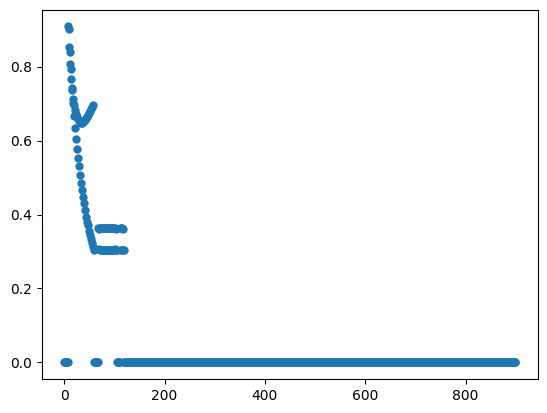

In [78]:
data = X_val[0]

plt.scatter(range(len(data)), data, linewidths=0.001)
plt.show()

In [98]:
l = list(np.random.randint(0, 10, 10))
l

[2, 8, 4, 6, 6, 7, 6, 1, 5, 2]

In [100]:
l[:100]

[2, 8, 4, 6, 6, 7, 6, 1, 5, 2]